In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from seaborn import heatmap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, roc_curve

In [6]:
!curl -O https://raw.githubusercontent.com/ydchen17/datasets/main/uci-epileptic-seizure-recognition.csv
df = pd.read_csv('uci-epileptic-seizure-recognition.csv', index_col=0)
df.info()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7445k  100 7445k    0     0  16.4M      0 --:--:-- --:--:-- --:--:-- 16.4M
<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, x1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [7]:
from tensorflow.keras.utils import to_categorical
X = df.drop('y' ,axis = 1)
y = to_categorical(df['y']-1)

SS = StandardScaler()
SS.fit(X)
SS_X = SS.transform(X)

In [8]:
SS_X = np.expand_dims(SS_X, axis=-1)
SS_X.shape

(11500, 178, 1)

In [9]:
SS_X_train, SS_X_test, y_train, y_test = train_test_split(SS_X, y, train_size=0.7)

In [37]:
SS_X_train.shape

(8049, 178, 1)

In [38]:
y_train.shape

(8049, 5)

In [39]:
SS_X_test.shape

(3451, 178, 1)

# sigmoid 

In [40]:
# # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7772824/

import keras
from keras import Sequential
from keras.layers.core import SpatialDropout1D
from keras.layers import Embedding, Dense, LSTM, BatchNormalization, Conv1D, MaxPooling1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam


model = Sequential()
model.add(Conv1D(64, 15, strides=2,
                        input_shape=(178, 1), use_bias=False))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 3))
model.add(Conv1D(64, 3, strides=2))
model.add(Conv1D(64, 3))
model.add(Dense(256, activation="sigmoid"))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
# model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))
adam = Adam()
model.compile(optimizer=adam,
              loss="categorical_crossentropy", metrics=["acc"])

model.summary()
plot_model(model)

history_1 = model.fit(SS_X_train, y_train, epochs=100)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_12 (Conv1D)           (None, 82, 64)            960       
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 41, 64)            0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 39, 64)            12352     
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 19, 64)            12352     
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 17, 64)            12352     
_________________________________________________________________
dense_9 (Dense)              (None, 17, 256)           16640     
_________________________________________________________________
lstm_6 (LSTM)                (None, 17, 64)           

In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, roc_curve, confusion_matrix
y_pred=model.predict(SS_X_test) 
y_pred=np.argmax(y_pred, axis=1)
y_test_simplified=np.argmax(y_test, axis=1)

print(accuracy_score(y_test_simplified, y_pred),
      precision_score(y_test_simplified, y_pred, average="macro"),
      recall_score(y_test_simplified, y_pred, average="macro"),
      f1_score(y_test_simplified, y_pred, average="macro"))

0.7800637496377861 0.7823527472985761 0.7786876572039787 0.778957458079885


In [42]:
confusion_matrix(y_test_simplified+1, y_pred)

array([[  0,   0,   0,   0,   0,   0],
       [664,  10,   4,   4,   1,   0],
       [  8, 399, 225,  13,  18,   0],
       [  4, 134, 500,  13,  34,   0],
       [  0,   9,  13, 542, 130,   0],
       [  0,  16,  35,  88, 587,   0]])

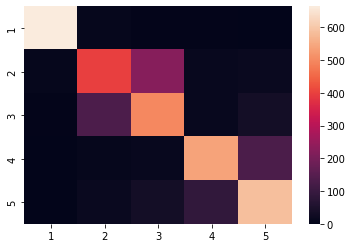

In [43]:
from seaborn import heatmap
x_labels = [1,2,3,4,5]
heatmap(confusion_matrix(y_test_simplified, y_pred),  xticklabels=x_labels, yticklabels=x_labels)

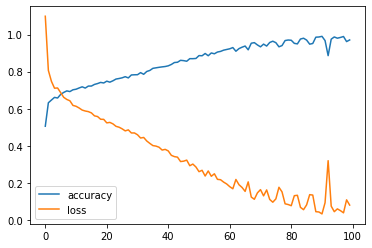

In [44]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
import matplotlib.pyplot as plt
plt.plot(history_1.history['acc'])
plt.plot(history_1.history['loss'])
plt.legend(['accuracy', 'loss'], loc='lower left')

# relu

In [11]:
# # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7772824/

import keras
from keras import Sequential
from keras.layers.core import SpatialDropout1D
from keras.layers import Embedding, Dense, LSTM, BatchNormalization, Conv1D, MaxPooling1D,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.layers import Embedding, Dense, LSTM, BatchNormalization, Conv1D, MaxPooling1D,Dropout

In [45]:
model = Sequential()
model.add(Conv1D(64, 15, strides=2,
                        input_shape=(178, 1), use_bias=False))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 3))
model.add(Conv1D(64, 3, strides=2))
model.add(Conv1D(64, 3))
model.add(Dense(256, activation="relu"))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
# model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))
adam = Adam()
model.compile(optimizer=adam,
              loss="categorical_crossentropy", metrics=["acc"])

model.summary()
plot_model(model)
history_2 = model.fit(SS_X_train, y_train, epochs=100)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_16 (Conv1D)           (None, 82, 64)            960       
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 41, 64)            0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 39, 64)            12352     
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 19, 64)            12352     
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 17, 64)            12352     
_________________________________________________________________
dense_11 (Dense)             (None, 17, 256)           16640     
_________________________________________________________________
lstm_8 (LSTM)                (None, 17, 64)           

In [46]:
y_pred=model.predict(SS_X_test) 
y_pred=np.argmax(y_pred, axis=1)

print(accuracy_score(y_test_simplified, y_pred),
      precision_score(y_test_simplified, y_pred, average="macro"),
      recall_score(y_test_simplified, y_pred, average="macro"),
      f1_score(y_test_simplified, y_pred, average="macro"))

0.7771660388293248 0.7758437884434493 0.7766844828025499 0.776090618947297


In [47]:
print(confusion_matrix(y_test_simplified+1, y_pred+1))

[[668  11   3   1   0]
 [ 12 455 170   7  19]
 [  8 170 444  20  43]
 [  1   7   6 553 127]
 [  0  21  22 121 562]]


In [48]:
y_test_simplified+1

array([3, 4, 4, ..., 4, 3, 1])

In [49]:
y_pred+1

array([3, 4, 4, ..., 4, 3, 1])

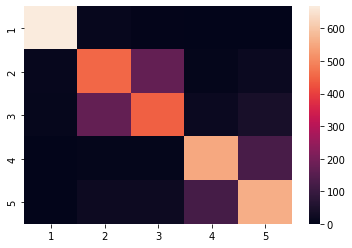

In [50]:
from seaborn import heatmap
x_labels = [1,2,3,4,5]
heatmap(confusion_matrix(y_test_simplified+1, y_pred+1),  xticklabels=x_labels, yticklabels=x_labels)

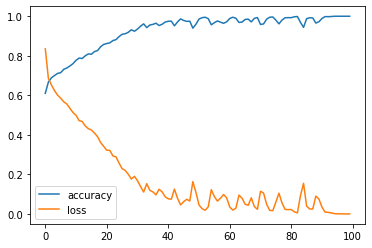

In [51]:
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['loss'])
plt.legend(['accuracy', 'loss'], loc='lower left')

# More Dense Layers

In [52]:
model = Sequential()
model.add(Conv1D(64, 15, strides=2,
                        input_shape=(178, 1), use_bias=False))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(64, 3))
model.add(Conv1D(64, 3, strides=2))
model.add(Conv1D(64, 3))
model.add(Dense(256, activation="relu"))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation="softmax"))
adam = Adam()
model.compile(optimizer=adam,
              loss="categorical_crossentropy", metrics=["acc"])

model.summary()
plot_model(model)
history_2 = model.fit(SS_X_train, y_train, epochs=100)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 82, 64)            960       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 41, 64)            0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 39, 64)            12352     
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 19, 64)            12352     
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 17, 64)            12352     
_________________________________________________________________
dense_13 (Dense)             (None, 17, 256)           16640     
_________________________________________________________________
lstm_10 (LSTM)               (None, 17, 64)           

In [53]:
y_pred=model.predict(SS_X_test) 
y_pred=np.argmax(y_pred, axis=1)

print(accuracy_score(y_test_simplified, y_pred),
      precision_score(y_test_simplified, y_pred, average="macro"),
      recall_score(y_test_simplified, y_pred, average="macro"),
      f1_score(y_test_simplified, y_pred, average="macro"))

0.7658649666763258 0.7669464549593915 0.7652024931766573 0.7656176969144672


In [55]:
print(confusion_matrix(y_test_simplified, y_pred))

[[668  11   1   3   0]
 [ 14 443 183   4  19]
 [ 13 196 436  14  26]
 [  0  11  19 530 134]
 [  0  29  51  80 566]]


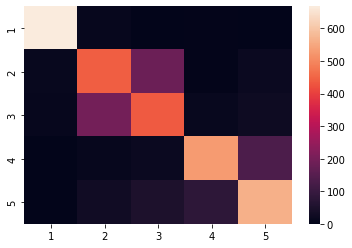

In [56]:
from seaborn import heatmap
x_labels = [1,2,3,4,5]
heatmap(confusion_matrix(y_test_simplified+1, y_pred+1),  xticklabels=x_labels, yticklabels=x_labels)

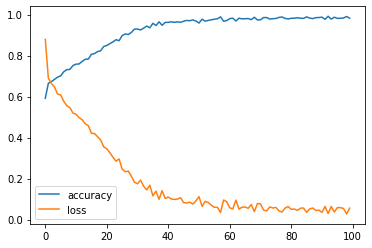

In [57]:
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['loss'])
plt.legend(['accuracy', 'loss'], loc='lower left')

# Batch Normalisation

In [61]:
model = Sequential()
model.add(Conv1D(64, 15, strides=2,
                        input_shape=(178, 1), use_bias=False))
model.add(Conv1D(64, 3))
model.add(Conv1D(64, 3, strides=2))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv1D(64, 3))
model.add(Conv1D(64, 3, strides=2))
model.add(BatchNormalization())
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
# model.add(Dropout(0.5))
adam = Adam()
model.add(Dense(5, activation="softmax"))
model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=["acc"])

model.summary()
plot_model(model)

history_3 = model.fit(SS_X_train, y_train, epochs=100)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_27 (Conv1D)           (None, 82, 64)            960       
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 80, 64)            12352     
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 39, 64)            12352     
_________________________________________________________________
batch_normalization_1 (Batch (None, 39, 64)            256       
_________________________________________________________________
dropout (Dropout)            (None, 39, 64)            0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 37, 64)            12352     
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 18, 64)           

In [62]:
y_pred=model.predict(SS_X_test) 
y_pred=np.argmax(y_pred, axis=1)

print(accuracy_score(y_test_simplified, y_pred),
      precision_score(y_test_simplified, y_pred, average="macro"),
      recall_score(y_test_simplified, y_pred, average="macro"),
      f1_score(y_test_simplified, y_pred, average="macro"))

0.7186322804984062 0.7218400338258258 0.7184137008259646 0.7198930062828156


In [64]:
print(confusion_matrix(y_test_simplified, y_pred))

[[638  26   9   6   4]
 [ 12 415 197   6  33]
 [  1 192 410  16  66]
 [  0   5  11 514 164]
 [  0  17  52 154 503]]


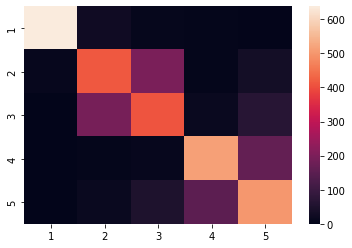

In [65]:
from seaborn import heatmap
x_labels = [1,2,3,4,5]
heatmap(confusion_matrix(y_test_simplified+1, y_pred+1),  xticklabels=x_labels, yticklabels=x_labels)

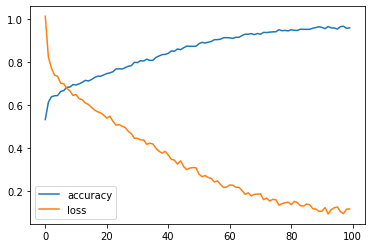

In [66]:
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['loss'])
plt.legend(['accuracy', 'loss'], loc='lower left')

# Untrained models

In [ ]:
model = Sequential()
model.add(Conv1D(64, 15, strides=1, input_shape=(178, 1), use_bias=False))
model.add(Dense(64, activation="relu"))
model.add(MaxPooling1D(pool_size=2, strides=2))
model.add(Conv1D(128, 3))
model.add(Conv1D(512, 3))
model.add(Conv1D(1024, 3))
model.add(Dense(256, activation="relu"))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64))
# model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))
adam = Adam()
model.compile(optimizer=adam,
              loss="categorical_crossentropy", metrics=["acc"])

model.summary()
plot_model(model)
history_5 = model.fit(SS_X_train, y_train, epochs=10)

# Summary

In [ ]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
import matplotlib.pyplot as plt
plt.plot(history_1.history['acc'])
plt.plot(history_2.history['acc'])
plt.plot(history_3.history['acc'])
plt.plot(history_4.history['acc'])
plt.legend(['Model 1', 'Model 2', "Model 3", "Model 4"], loc='lower left')